# Курсовой проект по курсу "Алгоритмы для анализа данных"

**Цель** - предсказать вероятность того, подойдет ли репетитор для подготовки к экзамену по математике.

Данные взяты с платформы kaggle https://www.kaggle.com/c/choose-tutors/overview

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor # на сколько я помню, было разрешено его использовать в алгоритме градиентного бустинга

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from tqdm import tqdm

C:\Users\lenas\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Загрузка данных

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [3]:
train.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


In [4]:
test.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0


### Анализ данных для тренировочного датасета

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
 12  choose               10000 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 1015.8 KB


Пропущенных значений нет, категориальных признаков тоже нет

In [6]:
train.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,4999.50000,45.800900,1.974800,1702.440000,1.724300,0.37060,0.121500,0.117200,0.059100,0.02770,0.018000,64.435200,0.110900
std,2886.89568,8.030274,1.766883,523.789062,0.798845,0.48299,0.326724,0.321675,0.235824,0.16412,0.132958,13.595024,0.314024
min,0.00000,23.000000,0.000000,200.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,33.000000,0.000000
25%,2499.75000,40.000000,0.000000,1300.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,55.000000,0.000000
50%,4999.50000,46.000000,2.000000,1550.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,63.000000,0.000000
75%,7499.25000,51.000000,3.000000,2150.000000,2.000000,1.00000,0.000000,0.000000,0.000000,0.00000,0.000000,74.000000,0.000000
max,9999.00000,68.000000,9.000000,3950.000000,4.000000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,100.000000,1.000000


- средний возраст преподавателя 45 лет, минимальный возраст - 23, максимальный - 68
- минимальный опыт работы - 0, максимальный - 9, средний - около 2
- минимальная цена за урок - 200, максимальная - 3950, средняя - 1702
- минимальная квалификация - 1, максимальная - 4
- средний балл за экзамен - 64, минимальный - 13, максимальный 100

<AxesSubplot:xlabel='choose', ylabel='count'>

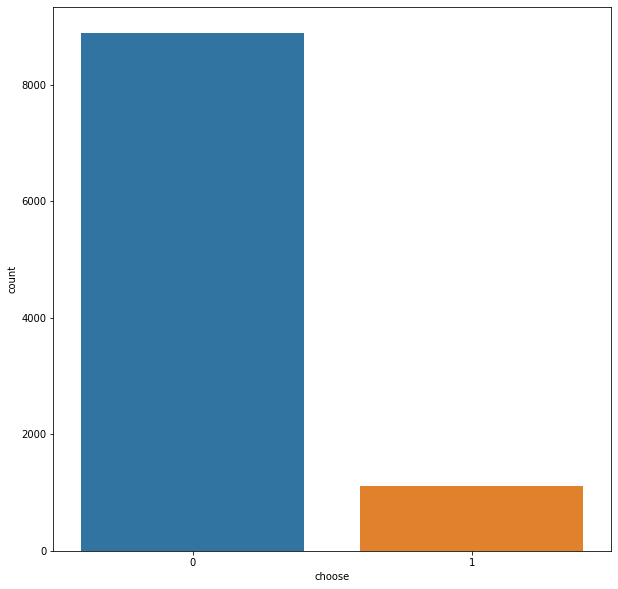

In [7]:
plt.figure(figsize=(10,10))
sns.countplot(train['choose'], data=train)

Большая часть преподавателей не подходят для подготовки к экзамену по математике

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'years_of_experience'}>,
        <AxesSubplot:title={'center':'lesson_price'}>],
       [<AxesSubplot:title={'center':'qualification'}>,
        <AxesSubplot:title={'center':'physics'}>,
        <AxesSubplot:title={'center':'chemistry'}>,
        <AxesSubplot:title={'center':'biology'}>],
       [<AxesSubplot:title={'center':'english'}>,
        <AxesSubplot:title={'center':'geography'}>,
        <AxesSubplot:title={'center':'history'}>,
        <AxesSubplot:title={'center':'mean_exam_points'}>],
       [<AxesSubplot:title={'center':'choose'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

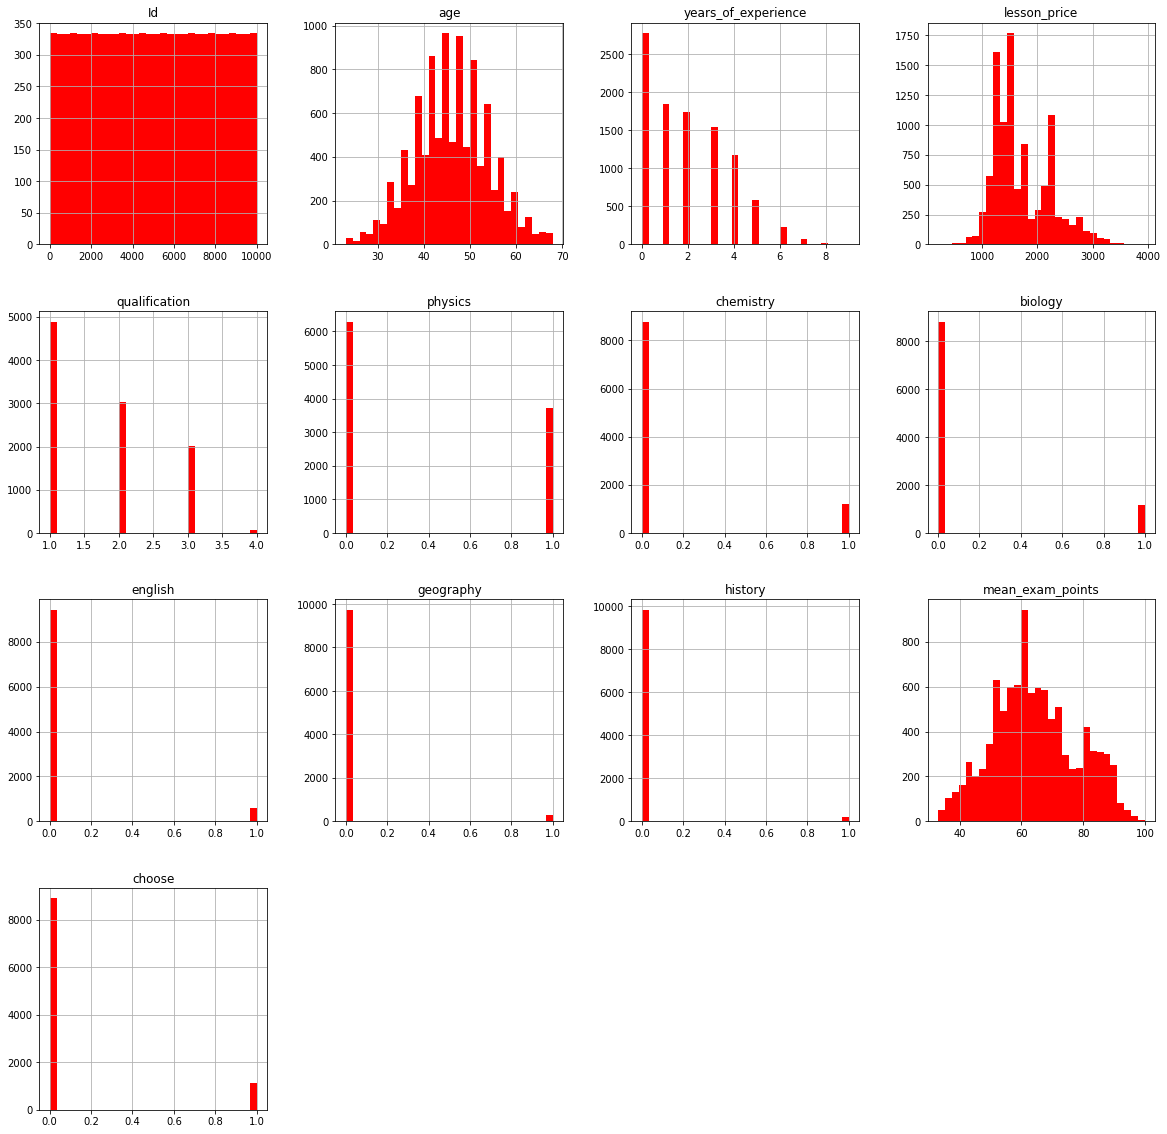

In [8]:
train.hist(bins=30, figsize=(20, 20), color = 'r')

- возраст преподавателей имеет нормальное распределение
- большее количество преподавателей с малым опытом работы и с первой квалификацией (идея - сделать новый признак возраст-квалификация)
- больше всего преподавателей, которые подошли для подготовки знают физику (скорее всего один из самых весомых признаков)
- в признаке "средний балл за экзамен" выделяется вторая вершина с более выскими баллами
- преподавателей с географией и историей выбирали крайне мало (возможно можно будет удалить эти признаки)

<AxesSubplot:>

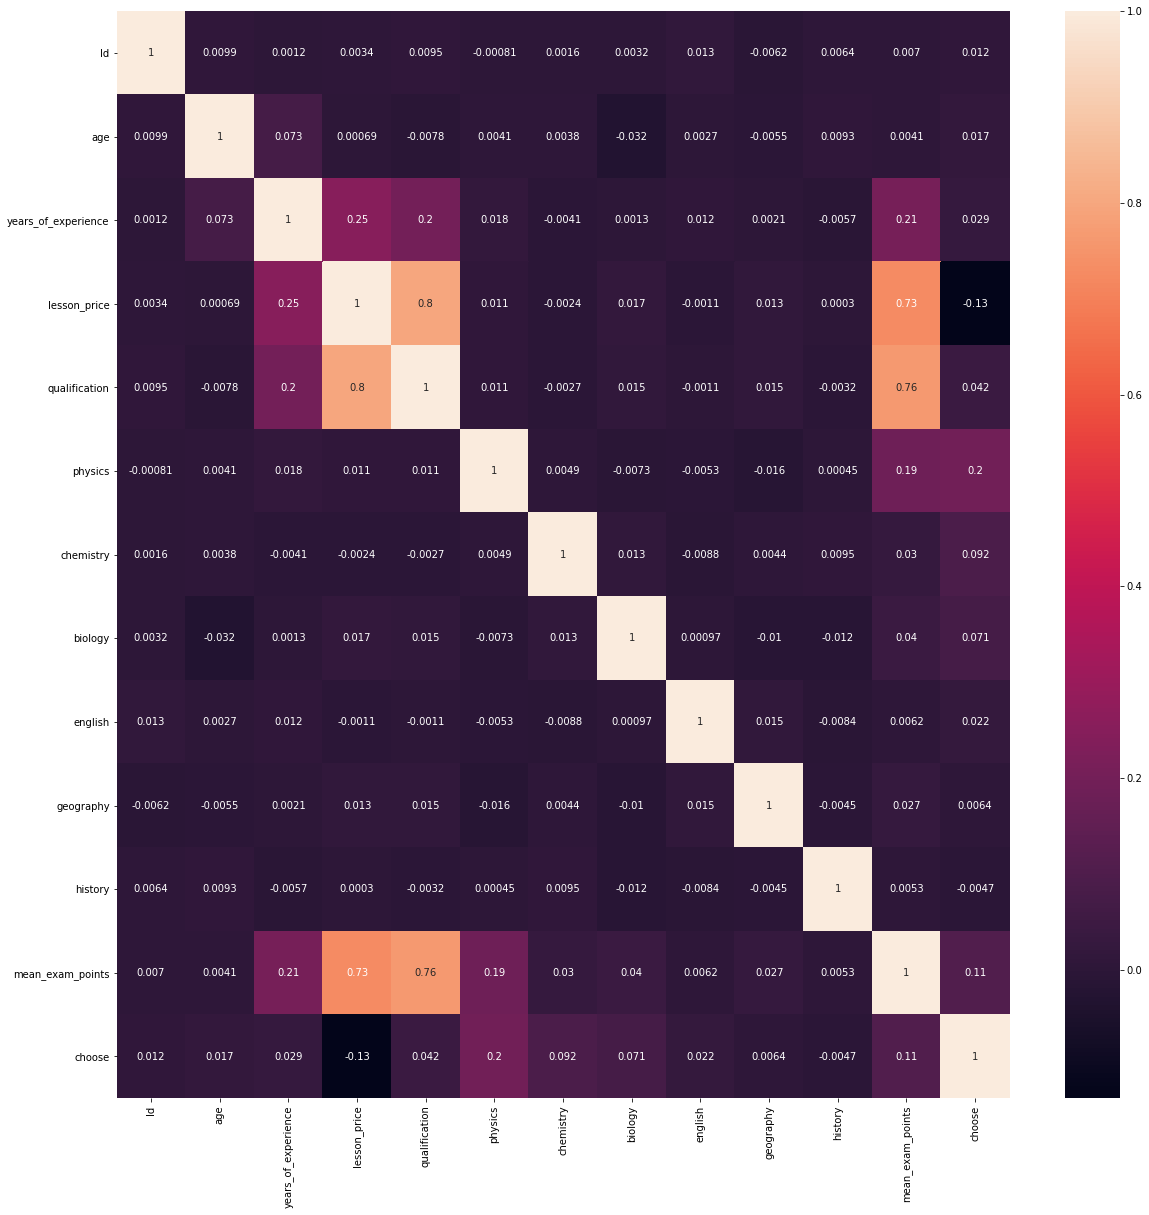

In [9]:
correlations = train.corr()
s, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

Наблюдается высокая корреляция между признакамии:
- средний балл за экзмен & цена за урок
- средний балл за экзамен & квалификация
- квалификация & цена за урок


<AxesSubplot:xlabel='mean_exam_points', ylabel='lesson_price'>

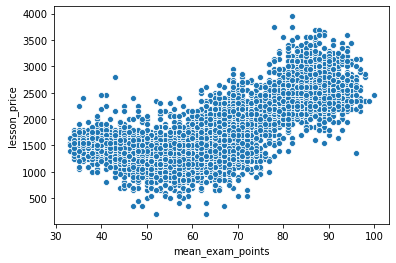

In [10]:
# Балл за экзамен & цена

sns.scatterplot(train['mean_exam_points'], train['lesson_price'])

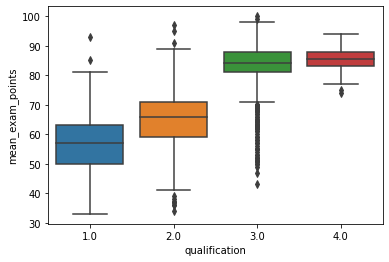

In [11]:
sns.boxplot(train['qualification'], train['mean_exam_points'], orient='v');

Заметно повышение среднего балла при повышении квалификации, а также видно, что 1 и 2 квалификация в группе имеют средний бал ниже, чем 3 и 4. Другими словами, 1 и 2, 3 и 4 имеют не такую большую разницу в среднем балле между собой.

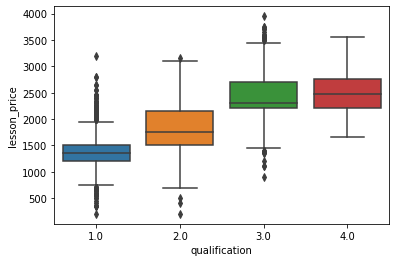

In [12]:
sns.boxplot(train['qualification'], train['lesson_price'], orient='v');

Можно заметить тенденцию увеличения цены с повышением квалификации преподавателя

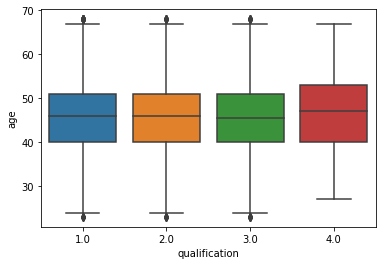

In [13]:
sns.boxplot(train['qualification'], train['age'], orient='v');

Квалификация преподавателей от возраста никак не изменяется

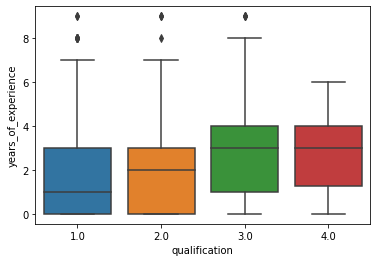

In [14]:
sns.boxplot(train['qualification'], train['years_of_experience'], orient='v');

В среднем с увеличением опыта работы повышается квалификация преподавателя. Можно разделить также на на две группу (1 и 2 квалификация приблизительно до 3 лет опыта работы, 3 и 4 от трех лет опыта работы)

#### Генерация новых призаков

Разобьем признак lesson_price на группы по квантилям

In [15]:
quartiles = [train['lesson_price'].quantile(0),
            train['lesson_price'].quantile(0.25),
            train['lesson_price'].quantile(0.5),
            train['lesson_price'].quantile(0.75),
            train['lesson_price'].quantile(1)]

In [16]:
train['price_group'] = pd.cut(train['lesson_price'], quartiles, labels = [1, 2, 3, 4]).astype('float')
train

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose,price_group
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0,3.0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1,1.0
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0,3.0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1,1.0
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,55.0,2.0,2150.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,79.0,0,3.0
9996,9996,53.0,2.0,1350.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0,2.0
9997,9997,44.0,5.0,1750.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,59.0,0,3.0
9998,9998,41.0,0.0,1700.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,72.0,0,3.0


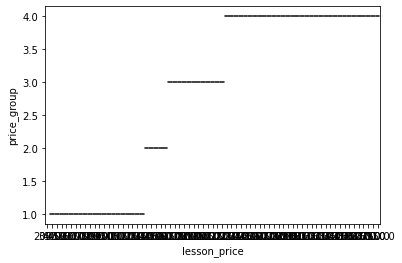

In [17]:
sns.boxplot(train['lesson_price'], train['price_group'], orient='v');

(Следующий признак сгенерируем по следующему принципу:
если квалификация равна либо 1, либо 2, то mean_exam_point будет иметь категорию 1
если квалификация = 3 или 4, то mean_exam_point = 2)

Сгруппируем преподавателей по возрасту

In [18]:
quartiles = [train['age'].quantile(0),
            train['age'].quantile(0.25),
            train['age'].quantile(0.5),
            train['age'].quantile(0.75),
            train['age'].quantile(1)]

In [19]:
train['age_group'] = pd.cut(train['age'], quartiles, labels = [1, 2, 3, 4]).astype('float')
train

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose,price_group,age_group
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0,3.0,1.0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1,1.0,4.0
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0,3.0,1.0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1,1.0,1.0
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,55.0,2.0,2150.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,79.0,0,3.0,4.0
9996,9996,53.0,2.0,1350.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0,2.0,4.0
9997,9997,44.0,5.0,1750.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,59.0,0,3.0,2.0
9998,9998,41.0,0.0,1700.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,72.0,0,3.0,2.0


In [20]:
train

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose,price_group,age_group
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0,3.0,1.0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1,1.0,4.0
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0,3.0,1.0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1,1.0,1.0
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,55.0,2.0,2150.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,79.0,0,3.0,4.0
9996,9996,53.0,2.0,1350.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0,2.0,4.0
9997,9997,44.0,5.0,1750.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,59.0,0,3.0,2.0
9998,9998,41.0,0.0,1700.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,72.0,0,3.0,2.0


In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
 12  choose               10000 non-null  int64  
 13  price_group          9998 non-null   float64
 14  age_group            9979 non-null   float64
dtypes: float64(13), int64(2)
memory usage

### Тестовый датасет

Повторим те же действия для тестового датасета

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 937.6 KB


In [23]:
test.describe()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14999.50000,45.924500,1.985700,1699.910000,1.702300,0.372100,0.128100,0.115800,0.049000,0.029200,0.015100,64.149400
std,2886.89568,8.031977,1.771217,526.260094,0.789644,0.483389,0.334218,0.320001,0.215879,0.168375,0.121957,13.570096
min,10000.00000,23.000000,0.000000,300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000
25%,12499.75000,41.000000,0.000000,1300.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000
50%,14999.50000,46.000000,2.000000,1550.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,63.000000
75%,17499.25000,51.000000,3.000000,2150.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
max,19999.00000,68.000000,9.000000,3950.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,98.000000


- средний возраст преподавателя 45 лет, минимальный возраст - 23, максимальный - 68
- минимальный опыт работы - 0, максимальный - 9, средний - около 2
- минимальная цена за урок - 300, максимальная - 3950, средняя - 1699
- минимальная квалификация - 1, максимальная - 4
- средний балл за экзамен - 64, минимальный - 13, максимальный 98

array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'years_of_experience'}>],
       [<AxesSubplot:title={'center':'lesson_price'}>,
        <AxesSubplot:title={'center':'qualification'}>,
        <AxesSubplot:title={'center':'physics'}>],
       [<AxesSubplot:title={'center':'chemistry'}>,
        <AxesSubplot:title={'center':'biology'}>,
        <AxesSubplot:title={'center':'english'}>],
       [<AxesSubplot:title={'center':'geography'}>,
        <AxesSubplot:title={'center':'history'}>,
        <AxesSubplot:title={'center':'mean_exam_points'}>]], dtype=object)

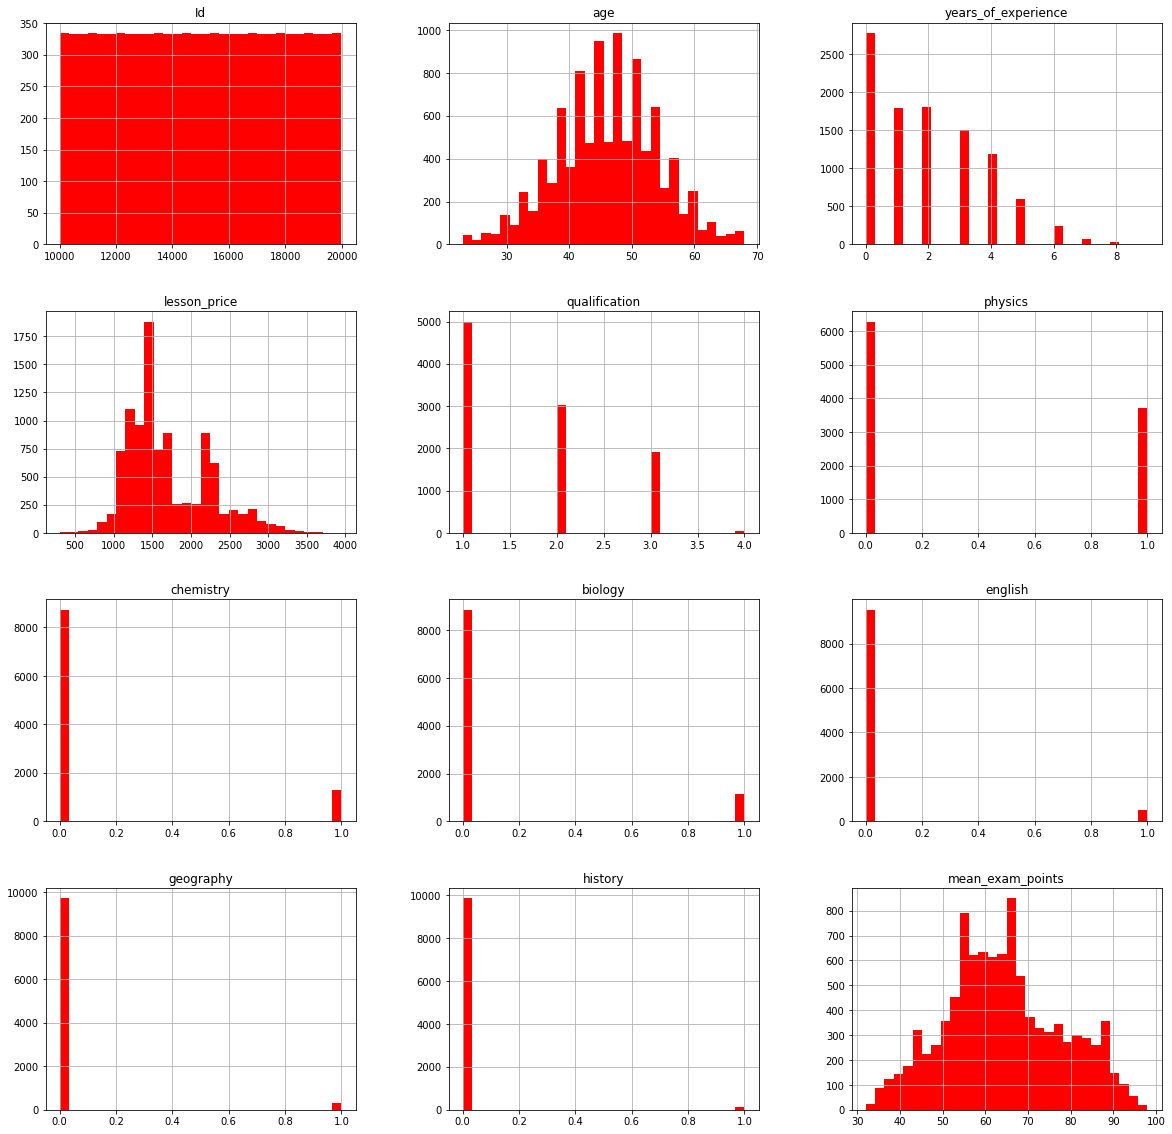

In [24]:
test.hist(bins=30, figsize=(20, 20), color = 'r')

- возраст преподавателей имеет нормальное распределение
- большее количество преподавателей с малым опытом работы и с первой квалификацией
- больше всего преподавателей, которые подошли для подготовки знают физику (скорее всего один из самых весомых признаков)
- преподавателей с географией и историей выбирали крайне мало (возможно можно будет удалить эти признаки)
- цена имеет две вершины

<AxesSubplot:>

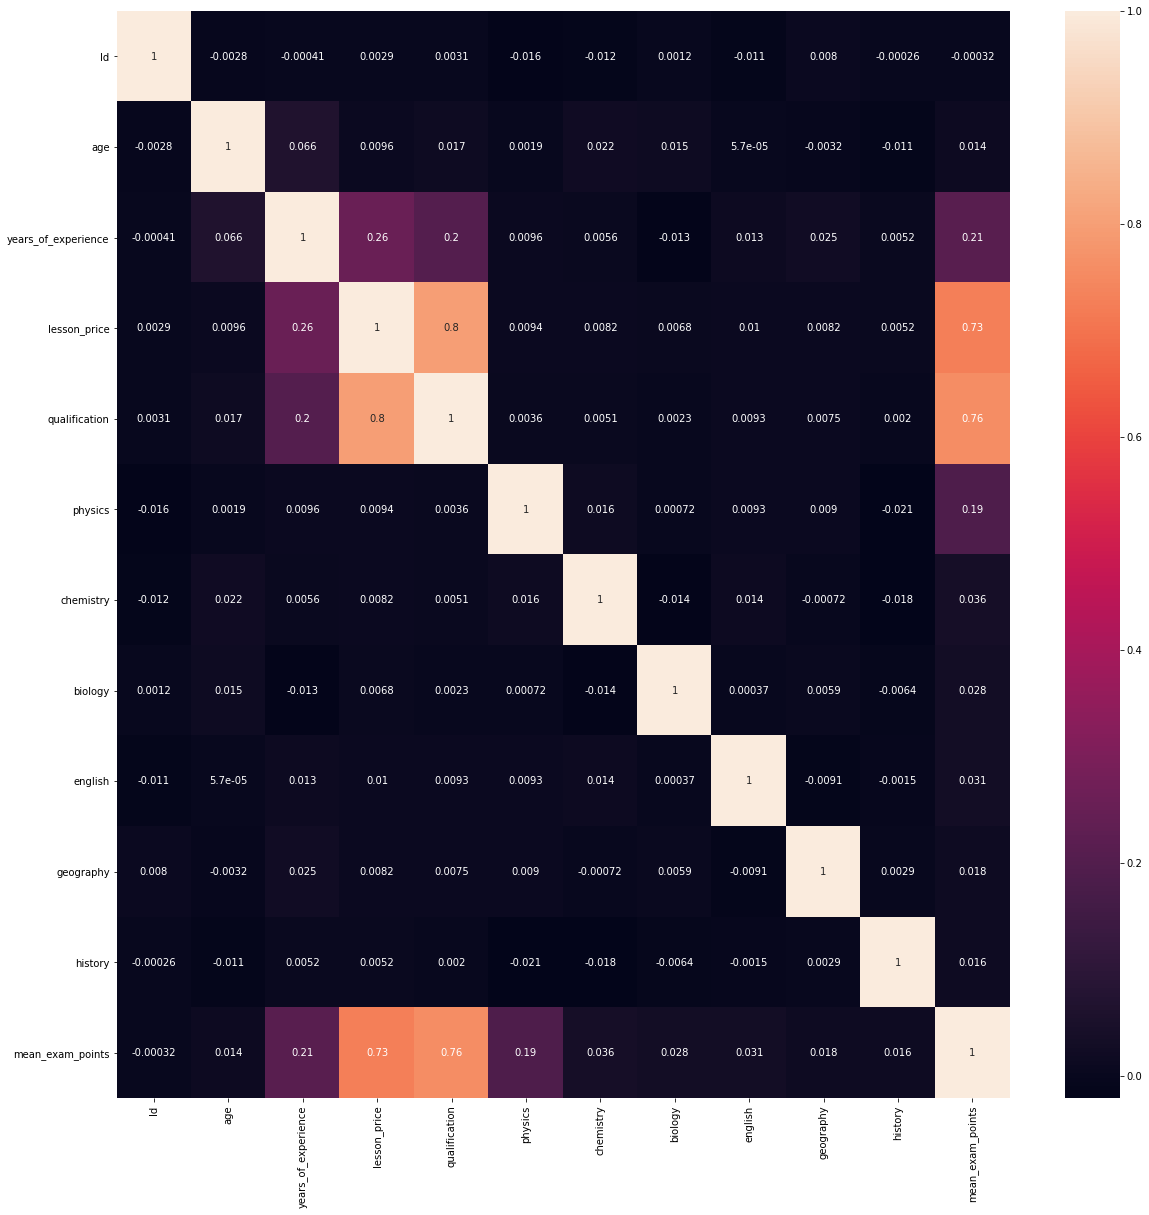

In [25]:
correlations = test.corr()
s, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

Наблюдается высокая корреляция между признакамии:
- средний балл за экзмен & цена за урок
- средний балл за экзамен & квалификация
- квалификация & цена за урок

#### Генерация новых призаков (делаем также, как в тренировочном датасете)

In [26]:
quartiles = [test['lesson_price'].quantile(0),
            test['lesson_price'].quantile(0.25),
            test['lesson_price'].quantile(0.5),
            test['lesson_price'].quantile(0.75),
            test['lesson_price'].quantile(1)]

In [27]:
test['price_group'] = pd.cut(test['lesson_price'], quartiles, labels = [1, 2, 3, 4]).astype('float')
test

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,price_group
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,4.0
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0,3.0
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,1.0
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0,4.0
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19995,44.0,3.0,1850.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,68.0,3.0
9996,19996,45.0,3.0,2450.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,72.0,4.0
9997,19997,44.0,2.0,1250.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,63.0,1.0
9998,19998,51.0,5.0,1000.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,64.0,1.0


In [28]:
quartiles = [test['age'].quantile(0),
            test['age'].quantile(0.25),
            test['age'].quantile(0.5),
            test['age'].quantile(0.75),
            test['age'].quantile(1)]

In [29]:
test['age_group'] = pd.cut(test['age'], quartiles, labels = [1, 2, 3, 4]).astype('float')
test

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,price_group,age_group
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,4.0,1.0
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0,3.0,1.0
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,1.0,2.0
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0,4.0,2.0
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19995,44.0,3.0,1850.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,68.0,3.0,2.0
9996,19996,45.0,3.0,2450.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,72.0,4.0,2.0
9997,19997,44.0,2.0,1250.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,63.0,1.0,2.0
9998,19998,51.0,5.0,1000.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,64.0,1.0,3.0


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
 12  price_group          9999 non-null   float64
 13  age_group            9975 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 1.1 MB


In [31]:
test.loc[test['price_group'].isnull(), 'price_group'] = test['price_group'].median()

In [32]:
test.loc[test['age_group'].isnull(), 'age_group'] = test['age_group'].median()

In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
 12  price_group          10000 non-null  float64
 13  age_group            10000 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 1.1 MB


#### Подготовка данных

Разобьем наши данные на признаки и целевую переменную. Кроме этого, уберем из признаков переменную "Id", так как она не играет роли для предсказания

In [34]:
X = train.drop(['choose', 'Id'], axis=1)
y = train['choose']

In [35]:
train

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose,price_group,age_group
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0,3.0,1.0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1,1.0,4.0
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0,3.0,1.0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1,1.0,1.0
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,55.0,2.0,2150.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,79.0,0,3.0,4.0
9996,9996,53.0,2.0,1350.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0,0,2.0,4.0
9997,9997,44.0,5.0,1750.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,59.0,0,3.0,2.0
9998,9998,41.0,0.0,1700.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,72.0,0,3.0,2.0


In [36]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  float64
 1   years_of_experience  10000 non-null  float64
 2   lesson_price         10000 non-null  float64
 3   qualification        10000 non-null  float64
 4   physics              10000 non-null  float64
 5   chemistry            10000 non-null  float64
 6   biology              10000 non-null  float64
 7   english              10000 non-null  float64
 8   geography            10000 non-null  float64
 9   history              10000 non-null  float64
 10  mean_exam_points     10000 non-null  float64
 11  price_group          9998 non-null   float64
 12  age_group            9979 non-null   float64
dtypes: float64(13)
memory usage: 1015.8 KB


In [37]:
X.loc[X['price_group'].isnull(), 'price_group'] = X['price_group'].median()

In [38]:
X.loc[X['age_group'].isnull(), 'age_group'] = X['age_group'].median()

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  10000 non-null  float64
 1   years_of_experience  10000 non-null  float64
 2   lesson_price         10000 non-null  float64
 3   qualification        10000 non-null  float64
 4   physics              10000 non-null  float64
 5   chemistry            10000 non-null  float64
 6   biology              10000 non-null  float64
 7   english              10000 non-null  float64
 8   geography            10000 non-null  float64
 9   history              10000 non-null  float64
 10  mean_exam_points     10000 non-null  float64
 11  price_group          10000 non-null  float64
 12  age_group            10000 non-null  float64
dtypes: float64(13)
memory usage: 1015.8 KB


Отмасштабируем признаки с помощью метода стандартизации

In [40]:
# Функция стандартизации

def calc_std_feat(x):
    res = (x - x.mean()) / x.std()
    return res

In [41]:
X_st = X.copy()
X_st = calc_std_feat(X_st)
X_st

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,price_group,age_group
0,-1.345023,-1.117674,0.854466,0.345123,-0.767304,-0.371874,-0.364343,-0.250611,-0.168779,-0.135381,0.703552,0.519445,-1.297976
1,0.771966,0.014262,-0.863783,0.345123,1.303134,-0.371874,2.744389,-0.250611,-0.168779,7.385804,-0.546906,-1.287635,1.395479
2,-2.092195,0.580231,0.090800,-0.906684,1.303134,-0.371874,-0.364343,-0.250611,-0.168779,-0.135381,0.115101,0.519445,-1.297976
3,-1.594080,0.580231,-1.245616,-0.906684,-0.767304,-0.371874,-0.364343,-0.250611,-0.168779,-0.135381,0.115101,-1.287635,-1.297976
4,0.024794,0.580231,1.045383,0.345123,1.303134,-0.371874,-0.364343,-0.250611,-0.168779,-0.135381,0.629995,1.422985,-0.400158
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.145552,0.014262,0.854466,0.345123,1.303134,-0.371874,-0.364343,-0.250611,-0.168779,-0.135381,1.071333,0.519445,1.395479
9996,0.896495,0.014262,-0.672866,-0.906684,-0.767304,-0.371874,-0.364343,-0.250611,-0.168779,-0.135381,-0.399793,-0.384095,1.395479
9997,-0.224264,1.712167,0.090800,-0.906684,-0.767304,-0.371874,-0.364343,-0.250611,-0.168779,7.385804,-0.399793,0.519445,-0.400158
9998,-0.597850,-1.117674,-0.004658,0.345123,1.303134,-0.371874,-0.364343,-0.250611,-0.168779,-0.135381,0.556439,0.519445,-0.400158


In [42]:
X_st = np.array(X_st)
y = np.array(y)

Разобьем тренировочный датасет на обучающую и тестовую выборки

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_st, y, test_size=0.3, random_state=1)

### Реализация модели градиентного бустинга на основе решающих деревьев

In [44]:
def gb_predict(X, trees_list, coef_list, eta):
    #Функция предсказания прогноза для каждого отдельного дерева
    
    # Реализуемый алгоритм градиентного бустинга будет инициализироваться нулевыми значениями,
    # поэтому все деревья из списка trees_list уже являются дополнительными и при предсказании прибавляются с шагом eta
    return np.array([sum([eta* coef * alg.predict([x])[0] for alg, coef in zip(trees_list, coef_list)]) for x in X])

def mean_squared_error(y_real, prediction):
    # функционал ошибки
    return (sum((y_real - prediction)**2)) / len(y_real)

def bias(y, z):
    # функция вектор сдвигов коэффициента
    return (y - z)

def gb_fit(n_trees, max_depth, X_train, X_test, y_train, y_test, coefs, eta):
    # функция для обучения модели
    
    # Деревья будем записывать в список
    trees = []
    
    # Будем записывать ошибки на обучающей и тестовой выборке на каждой итерации в список
    train_errors = []
    test_errors = []
    
    for i in range(n_trees):
        tree = DecisionTreeRegressor(max_depth=max_depth, random_state=42)

        # инициализируем бустинг начальным алгоритмом, возвращающим ноль, 
        # поэтому первый алгоритм просто обучаем на выборке и добавляем в список
        if len(trees) == 0:
            # обучаем первое дерево на обучающей выборке
            tree.fit(X_train, y_train)
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))
        else:
            # Получим ответы на текущей композиции
            target = gb_predict(X_train, trees, coefs, eta)
            
            # алгоритмы начиная со второго обучаем на сдвиг
            tree.fit(X_train, bias(y_train, target))
            
            train_errors.append(mean_squared_error(y_train, gb_predict(X_train, trees, coefs, eta)))
            test_errors.append(mean_squared_error(y_test, gb_predict(X_test, trees, coefs, eta)))

        trees.append(tree)
        
    return trees, train_errors, test_errors

Обучим алгоритм с разным количеством деревьев и проанализируем ошибку в зависимости от этого параметра

In [45]:
# Число деревьев в ансамбле
n_trees = [_ for _ in range(1, 11)]

# Максимальная глубина деревьев
max_depth = 5

# Шаг
eta = 0.1

train_errors_list = []
test_errors_list = []

for tree in n_trees:
    # для простоты примем коэффициенты равными 1
    coefs = [1] * tree
    trees, train_errors, test_errors = gb_fit(tree, max_depth, X_train, X_test, y_train, y_test, coefs, eta)
    train_errors_list.append(train_errors)
    test_errors_list.append(test_errors)
    
    # Произведем оценку алгоритма
    
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    print(f'Ошибка алгоритма из {tree} деревьев глубиной {max_depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')
    
    test_prediction = gb_predict(X_test, trees, coefs, eta)
    print(f'Ошибка алгоритма из {tree} деревьев глубиной {max_depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')


Ошибка алгоритма из 1 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 0.1070605062786288
Ошибка алгоритма из 1 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 0.10229515377520729
Ошибка алгоритма из 2 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 0.10235802838836264
Ошибка алгоритма из 2 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 0.09833624860829784
Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 0.09850860332756965
Ошибка алгоритма из 3 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 0.09541526978267846
Ошибка алгоритма из 4 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 0.09524790347620775
Ошибка алгоритма из 4 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 0.09281963897672998
Ошибка алгоритма из 5 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 0.09258381907758348
Ошибка алгоритма из 5 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 0.0908

Визуализируем зависимость ошибки от количества деревьев на графике

In [46]:
def n_trees_plot(n_trees, train_err, test_err):
    plt.xlabel('Number of Trees')
    plt.ylabel('MSE')
    plt.plot(n_trees, train_err, label='train error')
    plt.plot(n_trees, test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()

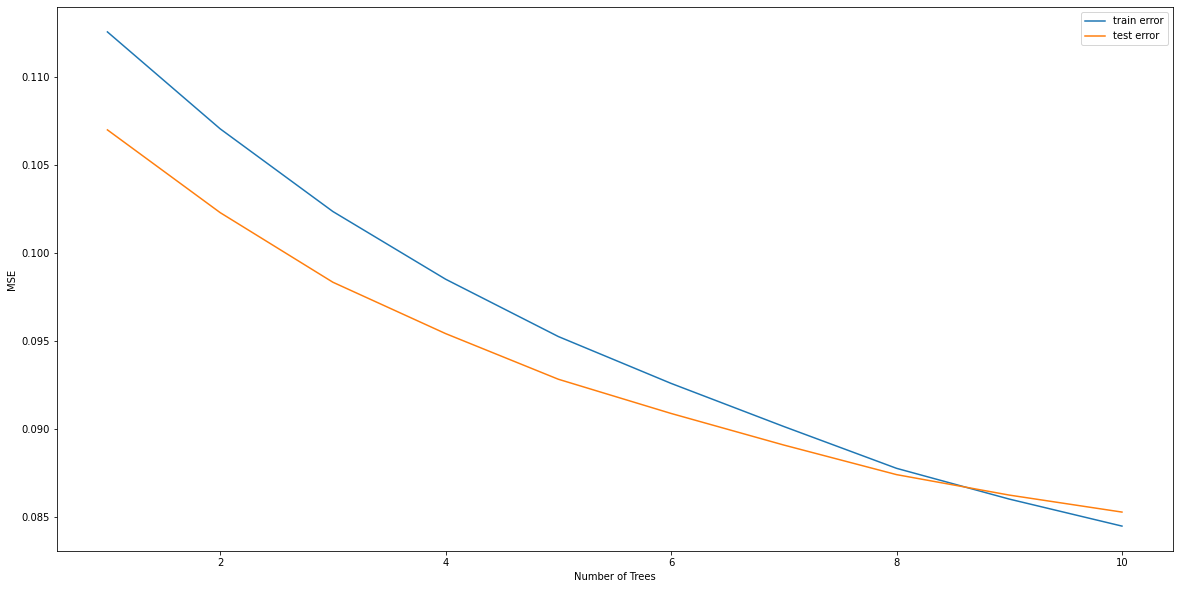

In [47]:
plt.figure(figsize=(20,10))
n_trees_plot(n_trees, train_errors_list[-1], test_errors_list[-1])

9 деревьев - оптимальный параметр, при неизменных остальных
- Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 0.08446878275998462
- Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 0.0852520609552986

#### ROC-AUC Score

In [48]:
y_pred = gb_predict(X_test, trees, coefs, eta)

In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

(0.0, 1.0)

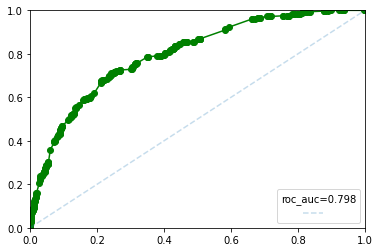

In [50]:
roc_auc = roc_auc_score(y_test, y_pred)

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], label="Random", linestyle="--", alpha=0.25)
plt.plot(fpr, tpr, color="green")
plt.scatter(fpr, tpr, color="green")
plt.legend(' ', title=f'roc_auc={roc_auc:.3f}', loc='lower right')
plt.xlim(0,1)
plt.ylim(0,1)

Теперь проанализируем зависимость ошибки от глубины дерева

In [51]:
# Число деревьев в ансамбле
n_trees = 9

# Максимальная глубина деревьев
max_depth = [_ for _ in range(1, 16)]

# Шаг
eta = 0.1

# для простоты примем коэффициенты равными 1
coefs = [1] * tree

train_errors_list = []
test_errors_list = []

for depth in max_depth:

    trees, train_errors, test_errors = gb_fit(n_trees, depth, X_train, X_test, y_train, y_test, coefs, eta)
    train_errors_list.append(train_errors[-1])
    test_errors_list.append(test_errors[-1])
    
    # Произведем оценку алгоритма
    
    train_prediction = gb_predict(X_train, trees, coefs, eta)
    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {depth} \
    с шагом {eta} на тренировочной выборке: {mean_squared_error(y_train, train_prediction)}')
    
    test_prediction = gb_predict(X_test, trees, coefs, eta)
    print(f'Ошибка алгоритма из {n_trees} деревьев глубиной {depth} \
    с шагом {eta} на тестовой выборке: {mean_squared_error(y_test, test_prediction)}')

Ошибка алгоритма из 9 деревьев глубиной 1     с шагом 0.1 на тренировочной выборке: 0.09706239288189052
Ошибка алгоритма из 9 деревьев глубиной 1     с шагом 0.1 на тестовой выборке: 0.0929188041720774
Ошибка алгоритма из 9 деревьев глубиной 2     с шагом 0.1 на тренировочной выборке: 0.09378240988808048
Ошибка алгоритма из 9 деревьев глубиной 2     с шагом 0.1 на тестовой выборке: 0.09047217335489667
Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 0.1 на тренировочной выборке: 0.09056794120820816
Ошибка алгоритма из 9 деревьев глубиной 3     с шагом 0.1 на тестовой выборке: 0.08779304125067519
Ошибка алгоритма из 9 деревьев глубиной 4     с шагом 0.1 на тренировочной выборке: 0.08792434066356902
Ошибка алгоритма из 9 деревьев глубиной 4     с шагом 0.1 на тестовой выборке: 0.08628975391188486
Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 0.1 на тренировочной выборке: 0.08446878127600353
Ошибка алгоритма из 9 деревьев глубиной 5     с шагом 0.1 на тестовой выборке: 0.0852

Визуализируем зависимость ошибки от глубины деревьев на графике

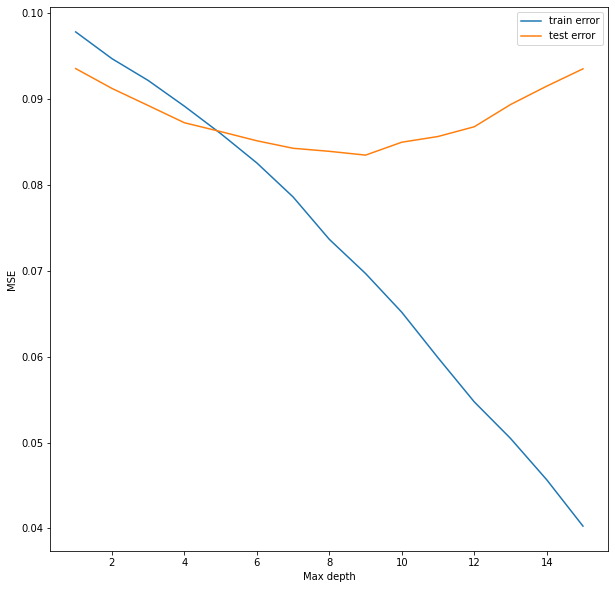

In [52]:
def depth_plot(max_depth, train_err, test_err):
    plt.xlabel('Max depth')
    plt.ylabel('MSE')
    plt.plot(max_depth, train_err, label='train error')
    plt.plot(max_depth, test_err, label='test error')
    plt.legend(loc='upper right')
    plt.show()
    
plt.figure(figsize=(10,10))
depth_plot(max_depth, train_errors_list, test_errors_list)

Оптимальная глубина деревьев - 5 при количестве деревьев 9 и скорости обучения 0.1
Далее ошибка на тренировочном датасете продолжает уменьшаться, но на тестовом начинает возрастать. Модель переобучается.

In [53]:
# Число деревьев в ансамбле
n_trees = 9

# Максимальная глубина деревьев
max_depth = 5

# Шаг
eta = 0.1

# Коэффициент
coefs = [1] * tree

# Обучаем модель
trees, train_errors, test_errors = gb_fit(tree, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

# Делаем предсказание
y_pred = gb_predict(X_test, trees, coefs, eta)

(0.0, 1.0)

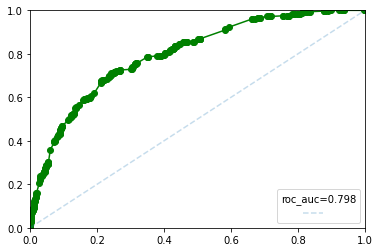

In [54]:
roc_auc = roc_auc_score(y_test, y_pred)

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], label="Random", linestyle="--", alpha=0.25)
plt.plot(fpr, tpr, color="green")
plt.scatter(fpr, tpr, color="green")
plt.legend(' ', title=f'roc_auc={roc_auc:.3f}', loc='lower right')
plt.xlim(0,1)
plt.ylim(0,1)

Удалим признак 'history' и обучим модель без этого признака

In [55]:
X2 = X.drop('history', axis=1)
X2

,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,mean_exam_points,price_group,age_group
0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,74.0,3.0,1.0
1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,57.0,1.0,4.0
2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,66.0,3.0,1.0
3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,1.0,1.0
4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,73.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,55.0,2.0,2150.0,2.0,1.0,0.0,0.0,0.0,0.0,79.0,3.0,4.0
9996,53.0,2.0,1350.0,1.0,0.0,0.0,0.0,0.0,0.0,59.0,2.0,4.0
9997,44.0,5.0,1750.0,1.0,0.0,0.0,0.0,0.0,0.0,59.0,3.0,2.0
9998,41.0,0.0,1700.0,2.0,1.0,0.0,0.0,0.0,0.0,72.0,3.0,2.0


In [56]:
X_st2 = X2.copy()
X_st2 = calc_std_feat(X2)

X_st2 = np.array(X_st)
y = np.array(y)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_st2, y, test_size=0.3, random_state=1)

In [58]:
# Число деревьев в ансамбле
n_trees = 9

# Максимальная глубина деревьев
max_depth = 5

# Шаг
eta = 0.1

# Коэффициент
coefs = [1] * tree

# Обучаем модель
trees, train_errors, test_errors = gb_fit(tree, max_depth, X_train, X_test, y_train, y_test, coefs, eta)

# Делаем предсказание
y_pred = gb_predict(X_test, trees, coefs, eta)

(0.0, 1.0)

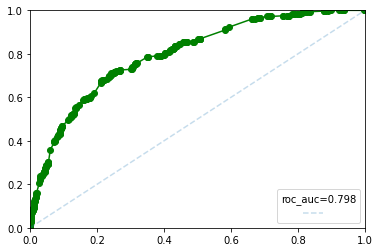

In [59]:
roc_auc = roc_auc_score(y_test, y_pred)

fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.plot([0, 1], [0, 1], label="Random", linestyle="--", alpha=0.25)
plt.plot(fpr, tpr, color="green")
plt.scatter(fpr, tpr, color="green")
plt.legend(' ', title=f'roc_auc={roc_auc:.3f}', loc='lower right')
plt.xlim(0,1)
plt.ylim(0,1)

Как видно, качество модели не поменялось

#### Обучим тестовый датасет на получившейся модели

In [60]:
test

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,price_group,age_group
0,10000,32.0,2.0,2700.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,4.0,1.0
1,10001,35.0,6.0,1800.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,71.0,3.0,1.0
2,10002,44.0,2.0,1200.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,45.0,1.0,2.0
3,10003,44.0,4.0,2950.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,92.0,4.0,2.0
4,10004,38.0,3.0,1400.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,58.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19995,44.0,3.0,1850.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,68.0,3.0,2.0
9996,19996,45.0,3.0,2450.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,72.0,4.0,2.0
9997,19997,44.0,2.0,1250.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,63.0,1.0,2.0
9998,19998,51.0,5.0,1000.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,64.0,1.0,3.0


In [61]:
# Для предсказания удалим признак 'Id'

X = test.copy()
X = X.drop('Id', axis=1)

In [62]:
X = np.array(calc_std_feat(X))
X

array([[-1.733633  ,  0.00807355,  1.9003721 , ...,  1.90496816,
         1.44482733, -1.25585695],
       [-1.36012594,  2.26640794,  0.19019113, ...,  0.50483064,
         0.53618804, -1.25585695],
       [-0.23960478,  0.00807355, -0.94992952, ..., -1.41114702,
        -1.28109053, -0.38337053],
       ...,
       [-0.23960478,  0.00807355, -0.85491947, ..., -0.08470095,
        -1.28109053, -0.38337053],
       [ 0.63191169,  1.70182434, -1.32996974, ..., -0.0110095 ,
        -1.28109053,  0.48911589],
       [-0.36410713, -1.12109365, -0.3798692 , ..., -1.70591282,
        -0.37245124, -0.38337053]])

In [63]:
prediction = gb_predict(X, trees, coefs, eta)

#### Сохранение

In [64]:
test['choose'] = prediction

In [65]:
test[test['choose'] < 0] = abs(test[test['choose'] < 0])

In [72]:
test['Id'] = test['Id'].astype(int)
test['Id']

0       10000
1       10001
2       10002
3       10003
4       10004
        ...  
9995    19995
9996    19996
9997    19997
9998    19998
9999    19999
Name: Id, Length: 10000, dtype: int32

In [66]:
test['choose'].to_csv('Elena_Shcherbakova_solution.csv')

In [73]:
df = pd.read_csv('Elena_Shcherbakova_solution.csv')
df

,Id,choose
0,0,0.016092
1,1,0.153213
2,2,0.014306
3,3,0.057806
4,4,0.127721
...,...,...
9995,9995,0.121249
9996,9996,0.061676
9997,9997,0.231496
9998,9998,0.485827


In [75]:
df['Id'] = test['Id']
df

,Id,choose
0,10000,0.016092
1,10001,0.153213
2,10002,0.014306
3,10003,0.057806
4,10004,0.127721
...,...,...
9995,19995,0.121249
9996,19996,0.061676
9997,19997,0.231496
9998,19998,0.485827


In [77]:
df = df[['Id', 'choose']]
df

,Id,choose
0,10000,0.016092
1,10001,0.153213
2,10002,0.014306
3,10003,0.057806
4,10004,0.127721
...,...,...
9995,19995,0.121249
9996,19996,0.061676
9997,19997,0.231496
9998,19998,0.485827


In [78]:
df.to_csv('Elena_Shcherbakova_solution.csv', index=False)